In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tau = 0.0001
N = 61
L = 1.0
h = L/(N-1)
kappa = 1.0
coeff = kappa*tau/(h*h)

print ("Need coeff < 0.5 for stability!!!")
print ("coeff = ",coeff)

Need coeff < 0.5 for stability!!!
coeff =  0.36000000000000004


In [4]:
#
# Initial conditions ... temperature is zero everywhere, except for a delta function at the center
#
tt = np.zeros(N)
tt[N-1] = 1.0/h

In [5]:
xplot = np.arange(N)*h-L/2.0
iplot = 0
nstep = 10*N
nplots = int(N/2)
plot_step = nstep/nplots

In [6]:
ttplot = np.empty((N,nplots))
tplot = np.empty(nplots)

for istep in range(nstep):
    tt[1:(N-1)] = ( tt[1:(N-1)] + coeff*( tt[2:N] + tt[0:(N-2)] - 2*tt[1:(N-1)] ) )
    
    if (istep+1) % plot_step < 1:
        ttplot[:,iplot] = np.copy(tt)
        tplot[iplot] = (istep+1)*tau
        iplot += 1

In [7]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

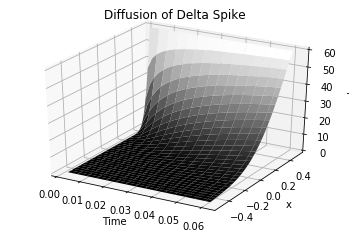

In [8]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
Tp, Xp = np.meshgrid(tplot,xplot)
ax.plot_surface(Tp,Xp,ttplot,rstride=2,cstride=2,cmap=cm.gray)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T')
ax.set_title('Diffusion of Delta Spike')
plt.show()

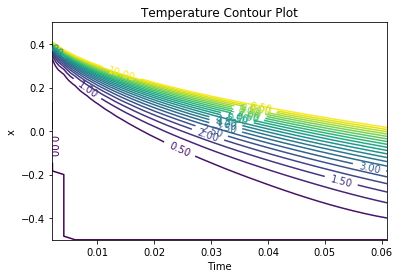

In [9]:
levels = np.linspace(0.0,10.0,num=21)
ct = plt.contour(tplot,xplot,ttplot,levels)
plt.clabel(ct,fmt='%1.2f')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Temperature Contour Plot')
plt.show()

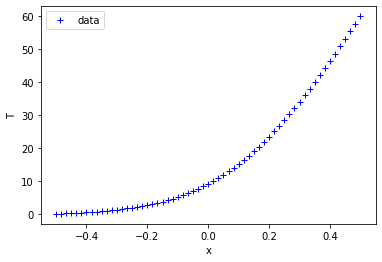

In [12]:
from scipy.optimize import curve_fit
from numpy import asarray as ar,exp
import math

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

x = ar(xplot)
y = ar(tt)

plt.plot(x,y,'b+',label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('T')
plt.show()